# Animated Plots in Python3 on CoCalc

inspired by http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

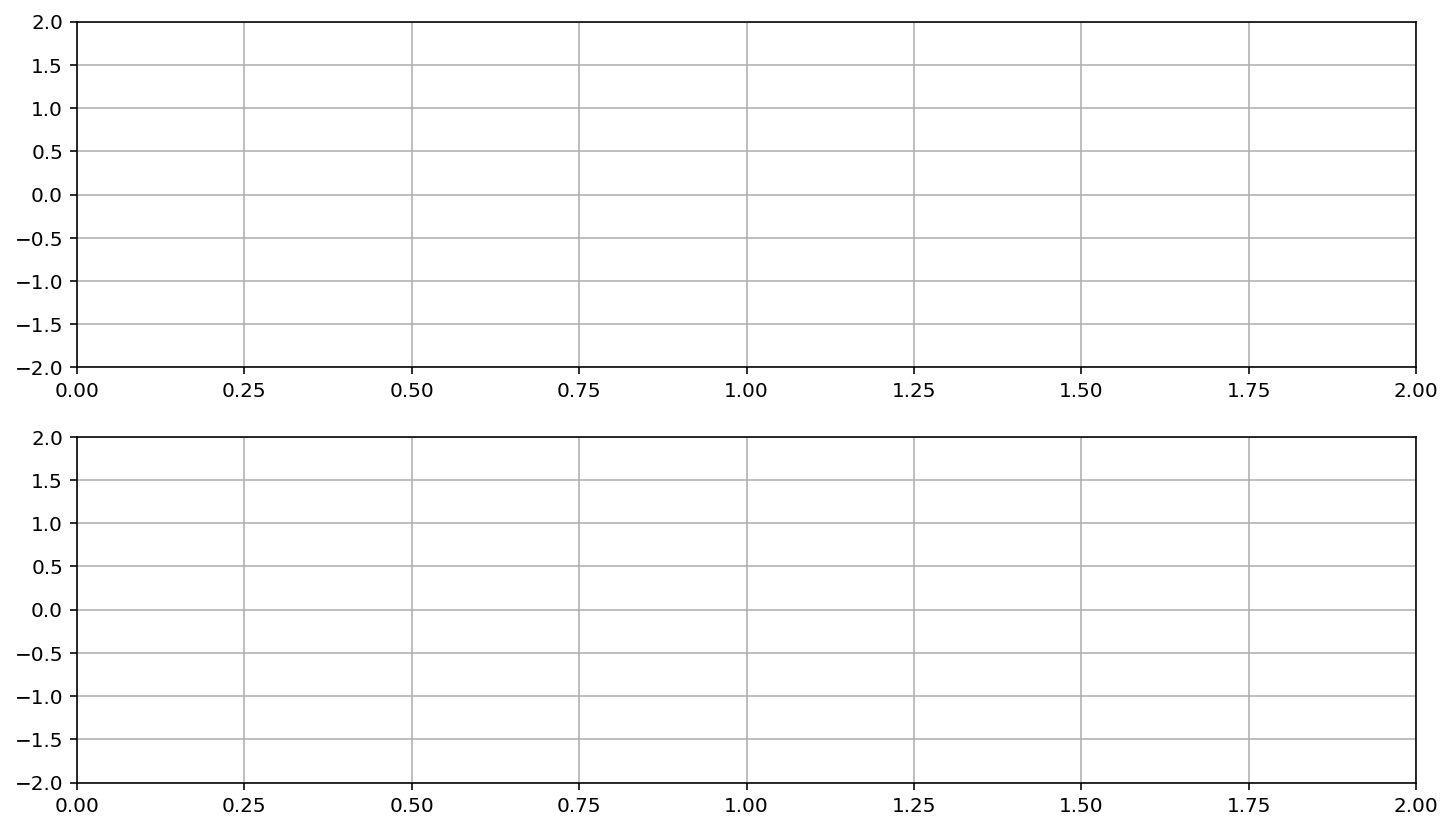

In [2]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.autoscale(enable=True, axis='y', tight=True)

ax1.set_xlim((0, 2))
ax1.set_ylim((-2, 2))

ax2.set_xlim((0, 2))
ax2.set_ylim((-2, 2))

ax1.grid()
ax2.grid()

line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='red')

In [3]:
# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return (line1, line2)

In [4]:
# animation function. This is called sequentially
# i is the number of the frame, which leads to one full "circle"
def animate(i):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.02 * i))
    y2 = np.cos(2 * np.pi * (x - 0.02 * i))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    return (line1, line2)

In [5]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig,
                               animate,
                               init_func=init,
                               frames=50,
                               interval=40,
                               blit=True)

In [6]:
anim

In [7]:
# this doesn't need this rc('animation', html='html5') parameter setting
HTML(anim.to_html5_video())